# extraction of components of All opinion about certain product from Ceneo.pl service and analysis


# Provide url for certain product 


In [32]:
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
import re
import csv
from getpass import getpass
from time import sleep
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
import pandas as pd
import time
from selenium.common.exceptions import NoSuchElementException
from googletrans import Translator

pro = input("input Url:   ")
if pro=='':
    pro= 'https://www.ceneo.pl/71872729'
    
pro=pro.strip()


driver = webdriver.Chrome()
driver.maximize_window()
driver.get(pro)
sleep(2)

input Url:   


WebDriverException: Message: unknown error: cannot determine loading status
from unknown error: cannot determine loading status
from disconnected: received Inspector.detached event
  (Session info: chrome=88.0.4324.182)


In [3]:
# <h1 class="c" data-onselect="true" data-tooltip-autowidth="true" productlink="#"> TEFAL LOFT KO250840</h1>
try:
    productname = driver.find_elements_by_class_name("product-top-2020__product-info__name.js_product-h1-link.js_product-force-scroll.js_searchInGoogleTooltip.default-cursor")
    productname=productname[0].text
except:
    productname=""


In [4]:
def scroll():
    
    last_position = driver.execute_script("return window.pageYOffset;")
    scrolling = True

    while scrolling:
        
        scroll_attempt = 0
        while True:
            # check scroll position
            driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
            sleep(2)
            curr_position = driver.execute_script("return window.pageYOffset;")
            if last_position == curr_position:
                scroll_attempt += 1

                # end of scroll region
                if scroll_attempt >= 2:
                    scrolling = False
                    break
                else:
                    sleep(2) # attempt another scroll
            else:
                last_position = curr_position

                break



In [5]:
listuser=[]
listuserscoer=[]
listpublised=[]
listtext=[]
print("Starting to scrape Reviews")

while True:
    scroll()
    try:
        more = driver.find_elements_by_class_name("page-tab-content.reviews.tab-control__item--reviews.theme__bg--primary.cf")
        more = more[0].find_elements_by_class_name("tab-control__more")
        more[0].click()
        sleep(2)
        scroll()
    except:
        pass
    
    
    
    
    try:
        product_reviews_container = driver.find_elements_by_class_name("js_product-reviews.js_reviews-hook.js_product-reviews-container")
        listofreviews=product_reviews_container[0].find_elements_by_class_name("user-post.user-post__card.js_product-review")
        
        
        
        if len(listofreviews)>0:
            for r in listofreviews:

        #     r=listofreviews[0]
                try:
                    user = r.find_elements_by_class_name("user-post__author-name")
                    user=user[0].text
                except:
                    user=""
                try:
                    user_score_count = r.find_elements_by_class_name("user-post__score-count")
                    user_score_count=user_score_count[0].text
                except:
                    user_score_count=""

                try:
                    post__published = r.find_elements_by_class_name("user-post__published")
                    post__published=post__published[0].text
                except:
                    post__published=""
                try:
                    post_text = r.find_elements_by_class_name("user-post__text")
                    post_text=post_text[0].text
                except:
                    post_text=""
                listuser.append(user)
                listuserscoer.append(user_score_count)
                listpublised.append(post__published)
                listtext.append(post_text)




        else:
            print("No Review Found")
    except:
        pass
    
    
    try:
        pegination = driver.find_elements_by_class_name("pagination")
        pegination = pegination[0].find_elements_by_class_name("pagination__item.pagination__next")
        pegination[0].click()
        sleep(2)
    except:
        print("End of Reviews")
        break

        
    
        
        
    

Starting to scrape Reviews
End of Reviews


In [6]:
driver.close()


In [7]:
data = {'User': listuser,'Score Count': listuserscoer,'Post Published':listpublised,'Post Text': listtext}  
df = pd.DataFrame(data)  
df

,User,Score Count,Post Published,Post Text
0,Szymon,5/5,"Wystawiono 2 lata temu, po 4 dniach użytkowania","Design rewelacja, kolor czarny ma swój urok al..."
1,Marcin,"3,5/5","Wystawiono 2 lata temu, po 2 tygodniach użytko...",Na rysunku wyglądał dużo lepiej. Duży minus za...
2,niezadowolonyKlientCostam,4/5,"Wystawiono 3 lata temu, po 3 tygodniach użytko...",Produkt dość głośny. Ale bardzo ładny i ładnie...
3,k...6,5/5,"Wystawiono 5 miesięcy temu, po miesiącu użytko...","Czajnik nie dosyć, że piękny (wiadomo to kwest..."
4,m...9,5/5,"Wystawiono 6 miesięcy temu, po miesiącu użytko...","Super czajnik, bardzo ładnie się prezentuje, ł..."
...,...,...,...,...
70,w...l,5/5,"Wystawiono 6 miesięcy temu, po tygodniu użytko...",supa
71,m...r,5/5,"Wystawiono 9 miesięcy temu, po 2 tygodniach uż...",oki
72,f...i,4/5,"Wystawiono 11 miesięcy temu, po miesiącu użytk...",Ok
73,e...a,5/5,"Wystawiono 11 miesięcy temu, po 2 dniach użytk...",ok


In [8]:
df.to_csv(productname+".csv")


In [30]:
for index, row in df.iterrows():
    phrase = translator.translate(row["Post Text"])
    df.at[index, "translated"] = phrase
    

In [33]:
dff=df

In [35]:

dff["reviewtext"] = dff['translated'].str.replace('[^\w\s]','')
dff["reviewtext"].replace({ r'\A\s+|\s+\Z': '', '\n' : ' '}, regex=True, inplace=True)

dff["reviewtext"] = dff.reviewtext.str.lower()

for index, row in dff["reviewtext"].iteritems():
    try:
        
        score = SentimentIntensityAnalyzer().polarity_scores(row)
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        comp = score['compound']
        if neg > pos:
            dff.loc[index, 'sentiment'] = 'negative'
        elif pos > neg:
            dff.loc[index, 'sentiment'] = 'positive'
        else:
            dff.loc[index, 'sentiment'] = 'neutral'
        dff.loc[index, 'neg'] = neg
        dff.loc[index, 'neu'] = neu
        dff.loc[index, 'pos'] = pos
        dff.loc[index, 'compound'] = comp
    except:
        pass
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])#Count_values for sentiment
dftext = count_values_in_column(dff,'sentiment')
dftext


/home/fahad/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Total,Percentage
positive,62,82.67
neutral,9,12.00
negative,4,5.33


In [36]:
summ=dftext['Total'].sum()
summ
dftext.dropna()
f = dftext
f.dropna(inplace=True)
f
modified = f.reset_index()
modified
try:
    
    ng=modified[modified['index'] =="negative"]
    ng=ng["Total"].tolist()
    ng=ng[0]
except:
    ng=0
try:
    
    nu=modified[modified['index'] =="neutral"]
    nu=nu["Total"].tolist()
    nu=nu[0]
except:
    nu=0
nu
try:
    p=modified[modified['index'] =="positive"]
    p=p["Total"].tolist()
    p=p[0]
except:
    p=0

finalscore=((p+nu)/summ)*100
finalscore



94.66666666666667

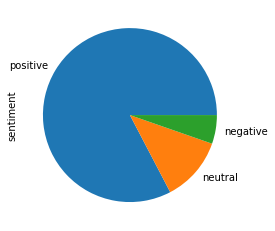

In [37]:
dff['sentiment'].value_counts().plot(kind='pie')